<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [53]:
%matplotlib inline
# Importing general EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Preprocessing related libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing train test split related libraries
from sklearn.model_selection import train_test_split

# Importing Modelling Libraries
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

# Importing metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import sklearn.metrics

In [3]:
%%capture
!pip install pycaret # So that we can have a general overview of what to choose

In [6]:
!pip install pycaret[analysis]

In [7]:
from pycaret.regression import *

## Load and Prepare Data

In [8]:
dataset1 = pd.read_csv("country_vaccinations.csv")
dataset2 = pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [9]:
dataset1.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [10]:
dataset2.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


## EDA

In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [12]:
dataset1.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [13]:
31240 - 30948 # There are 292 NaN in daily_vaccinations_per_million

292

In [14]:
dataset1['country'].nunique() # There are 218 different countries

218

The best columns to use here are daily_vaccinations and daily_vaccinations_per_million. These two have the least amount of null data which can be used to predict the future trends from.

It is also important to note that the more null handling we do, the less accurate our model will be. So using the data with the least number of null values is important.

In [15]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9157 non-null   object
 1   date                9157 non-null   object
 2   vaccine             9157 non-null   object
 3   total_vaccinations  9157 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 286.3+ KB


In [16]:
dataset1.groupby(['country', 'date']).count()

iso_code  total_vaccinations  people_vaccinated  \
country     date                                                          
Afghanistan 2021-02-22         1                   1                  1   
            2021-02-23         1                   0                  0   
            2021-02-24         1                   0                  0   
            2021-02-25         1                   0                  0   
            2021-02-26         1                   0                  0   
...                          ...                 ...                ...   
Zimbabwe    2021-07-11         1                   1                  1   
            2021-07-12         1                   1                  1   
            2021-07-13         1                   1                  1   
            2021-07-14         1                   1                  1   
            2021-07-15         1                   1                  1   

                        people_fully_vaccinated  daily_vaccinations_raw  \
country     date                                                          
Afghanistan 2021-02-22                        0                       0   
            2021-02-23                        0                       0   
            2021-02-24                        0                       0   
            2021-02-25                        0                       0   
            2021-02-26                        0                       0   
...                                         ...                     ...   
Zimbabwe    2021-07-11                        1                       0   
            2021-07-12                        1                       1   
            2021-07-13                        1                       1   
            2021-07-14                        1                       1   
            2021-07-15                        1                       1   

                        daily_vaccinations  total_vaccinations_per_hundred  \
country     date                                                             
Afghanistan 2021-02-22                   0                               1   
            2021-02-23                   1                               0   
            2021-02-24                   1                               0   
            2021-02-25                   1                               0   
            2021-02-26                   1                               0   
...                                    ...                             ...   
Zimbabwe    2021-07-11                   1                               1   
            2021-07-12                   1                               1   
            2021-07-13                   1                               1   
            2021-07-14                   1                               1   
            2021-07-15                   1                               1   

                        people_vaccinated_per_hundred  \
country     date                                        
Afghanistan 2021-02-22                              1   
            2021-02-23                              0   
            2021-02-24                              0   
            2021-02-25                              0   
            2021-02-26                              0   
...                                               ...   
Zimbabwe    2021-07-11                              1   
            2021-07-12                              1   
            2021-07-13                              1   
            2021-07-14                              1   
            2021-07-15                              1   

                        people_fully_vaccinated_per_hundred  \
country     date                                              
Afghanistan 2021-02-22                                    0   
            2021-02-23                                    0   
            2021-02-24                                    0   


In [17]:
# dataset2.groupby(['location','vaccine']).count() # Not Really useful since there are so many missing countries

In [18]:
dataset1.loc[dataset1.country == 'Afghanistan'].head(5) # only the first day of Afghanistan is NaN for daily_vaccinations_per_million

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [19]:
dataset1.loc[dataset1.daily_vaccinations_per_million.isna(), 'country'].value_counts().head(15)

Denmark             51
Cuba                13
Hungary             10
Guinea               3
Rwanda               2
Afghanistan          1
Palestine            1
Niger                1
Nigeria              1
Niue                 1
North Macedonia      1
Northern Cyprus      1
Northern Ireland     1
Norway               1
Oman                 1
Name: country, dtype: int64

We cannot conclude only the first rows are NaN

In [20]:
dataset1.loc[dataset1.country == 'Denmark']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7305,Denmark,DNK,2020-12-17,1.0,1.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
7306,Denmark,DNK,2020-12-18,2.0,2.0,NaN,1.0,1.0,0.0,0.00,NaN,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
7307,Denmark,DNK,2020-12-19,3.0,3.0,NaN,1.0,1.0,0.0,0.00,NaN,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
7308,Denmark,DNK,2020-12-20,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
7309,Denmark,DNK,2020-12-21,4.0,4.0,NaN,NaN,1.0,0.0,0.00,NaN,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511,Denmark,DNK,2021-07-11,NaN,3695762.0,2349187.0,NaN,NaN,NaN,63.81,40.56,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
7512,Denmark,DNK,2021-07-12,NaN,3731274.0,2403684.0,NaN,NaN,NaN,64.42,41.50,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
7513,Denmark,DNK,2021-07-13,NaN,3772028.0,2453301.0,NaN,NaN,NaN,65.12,42.36,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
7514,Denmark,DNK,2021-07-14,NaN,3815159.0,2497995.0,NaN,NaN,NaN,65.87,43.13,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...


In [21]:
dataset1c = dataset1.copy()

In [22]:
dataset1c['daily_vaccinations_per_million'] = dataset1c['daily_vaccinations_per_million'].ffill()
dataset1c['daily_vaccinations_per_million'] = dataset1c['daily_vaccinations_per_million'].bfill()

In [23]:
reg = setup(data = dataset1c,target = 'daily_vaccinations_per_million', numeric_imputation = 'mean',normalize = True, ignore_features = ['iso_code', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred','vaccines', 'source_name', 'source_website'],session_id = 3650)

,Description,Value
0,Session id,3650
1,Target,daily_vaccinations_per_million
2,Target type,Regression
3,Original data shape,"(31240, 15)"
4,Transformed data shape,"(31240, 3)"
5,Transformed train set shape,"(21868, 3)"
6,Transformed test set shape,"(9372, 3)"
7,Ignore features,12
8,Categorical features,2
9,Rows with missing values,62.3%


In [ ]:
compare_models(exclude = ['tr'] , turbo = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1540.7383,10548875.9299,3212.9669,0.5110,1.2510,4.7661,1.5560
gbr,Gradient Boosting Regressor,1699.3202,10850472.2768,3258.2647,0.4980,1.2992,5.2505,0.9220
xgboost,Extreme Gradient Boosting,1419.9967,11323356.2500,3325.6743,0.4745,1.1722,3.6762,0.3710
rf,Random Forest Regressor,1454.4287,11836647.2406,3413.6067,0.4446,1.0874,3.5644,3.3890
knn,K Neighbors Regressor,1724.6627,12274940.5000,3475.9131,0.4276,1.2611,4.9367,0.1020
lasso,Lasso Regression,1959.1335,12509919.7610,3507.7836,0.4181,1.5090,8.7886,0.0830
llar,Lasso Least Angle Regression,1959.1335,12509919.7653,3507.7836,0.4181,1.5090,8.7886,0.0990
br,Bayesian Ridge,1959.1948,12510221.8183,3507.8286,0.4180,1.5092,8.7907,0.1600
lar,Least Angle Regression,1959.1993,12510275.9961,3507.8374,0.4180,1.5093,8.7908,0.0840
ridge,Ridge Regression,1959.1974,12510253.1056,3507.8337,0.4180,1.5093,8.7907,0.0830


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=3650)

We can see that Light Gradient Boosting Machine, XGBoost and Random Forest can perform close to each other.
We have also learnt that we need to encode the countries, separate the year, month and day.

## Data Preprocessing

In [24]:
dataset1_training = dataset1[['country','date','daily_vaccinations_per_million']]

In [25]:
dataset1_training

,country,date,daily_vaccinations_per_million
0,Afghanistan,2021-02-22,NaN
1,Afghanistan,2021-02-23,35.0
2,Afghanistan,2021-02-24,35.0
3,Afghanistan,2021-02-25,35.0
4,Afghanistan,2021-02-26,35.0
...,...,...,...
31235,Zimbabwe,2021-07-11,1251.0
31236,Zimbabwe,2021-07-12,1561.0
31237,Zimbabwe,2021-07-13,1855.0
31238,Zimbabwe,2021-07-14,2065.0


In [26]:
dataset1_training['year'] = dataset1_training.date.astype(str).str[0:4].astype(float)
dataset1_training['month'] = dataset1_training.date.astype(str).str[5:7].astype(float)
dataset1_training['day'] = dataset1_training.date.astype(str).str[8:].astype(float)

In [27]:
dataset1_training.drop('date', axis = 1, inplace = True)

In [28]:
countries = dataset1_training.country.unique()

In [105]:
'''
for country in countries:
  dataset1_training.loc[dataset1_training.country == country, 'daily_vaccinations_per_million'].bfill(inplace=True) #failed
  '''

In [29]:
dataset1_training['daily_vaccinations_per_million'] = dataset1_training['daily_vaccinations_per_million'].bfill()

In [30]:
dataset1_training.isna().sum()

country                           0
daily_vaccinations_per_million    0
year                              0
month                             0
day                               0
dtype: int64

In [31]:
le = LabelEncoder()
dataset1_training['country'] = le.fit_transform(dataset1_training['country'])

## Strorytelling - Visualization

<Axes: xlabel='year', ylabel='daily_vaccinations_per_million'>

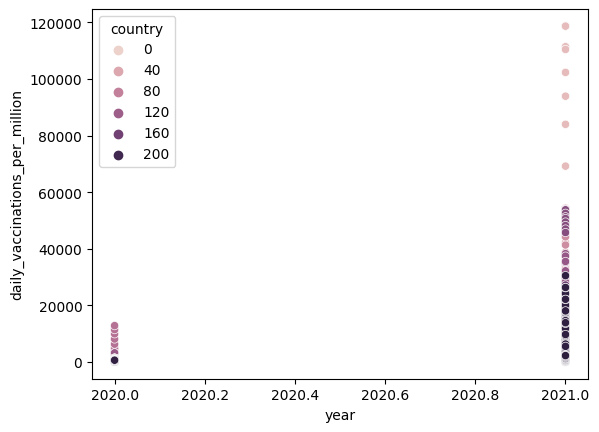

In [32]:
sns.scatterplot(dataset1_training, x=dataset1_training['year'], y=dataset1_training['daily_vaccinations_per_million'], hue=dataset1_training['country'])

It is not very insightful but at leat we can see that most of the countries are vaccinated daily per million on 2021

<Axes: xlabel='month', ylabel='daily_vaccinations_per_million'>

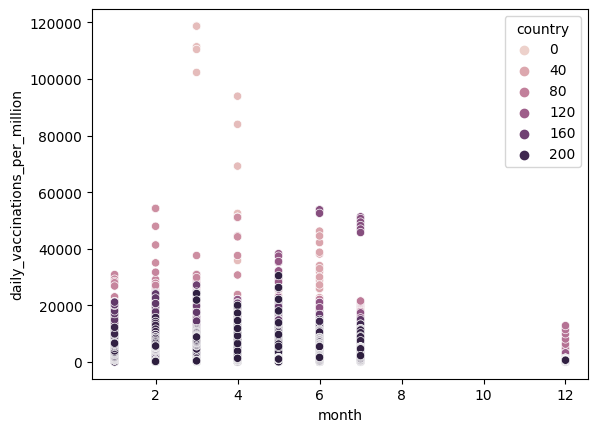

In [33]:
sns.scatterplot(dataset1_training, x=dataset1_training['month'], y=dataset1_training['daily_vaccinations_per_million'], hue=dataset1_training['country'])

There are no data showing there are any vaccinations happening in months 8 to 11

<Axes: xlabel='country', ylabel='daily_vaccinations_per_million'>

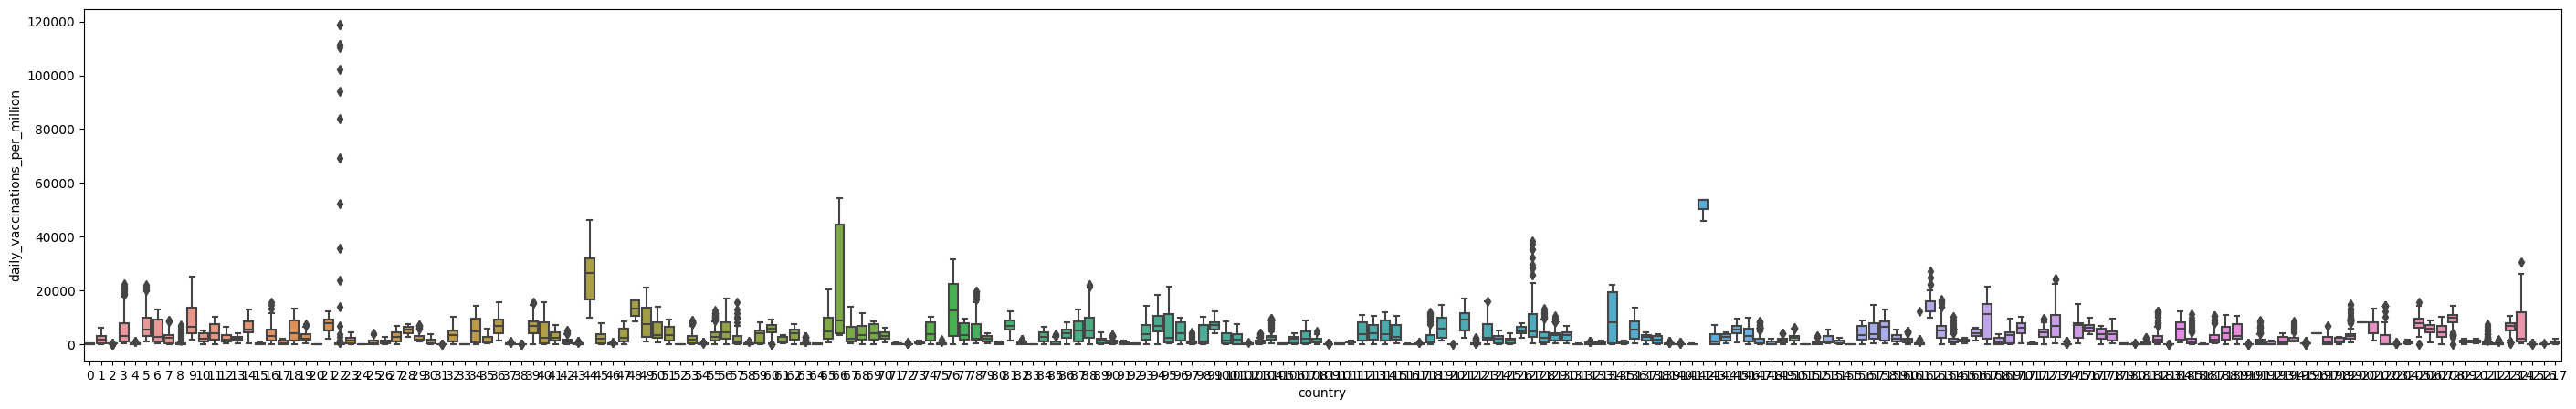

In [34]:
plt.figure(figsize=(35,5))
sns.boxplot(x=dataset1_training['country'], y=dataset1_training['daily_vaccinations_per_million'])

Avoiding outlier removal is a better approach. This is a time series data and removing outliers are not the greatest approach.

## Prepare Data for Machine learning

In [35]:
X = dataset1_training.loc[:,['country','day','month', 'year']].values
y = dataset1_training.loc[:,'daily_vaccinations_per_million'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # We have tried 20% as test data but let's reduce it to 10%

## Train your model

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28116, 4)
(28116,)
(3124, 4)
(3124,)


In [68]:
reg = setup(data = dataset1_training,target = 'daily_vaccinations_per_million', numeric_imputation = 'mean',normalize = True,session_id = 3650)

,Description,Value
0,Session id,3650
1,Target,daily_vaccinations_per_million
2,Target type,Regression
3,Original data shape,"(31240, 5)"
4,Transformed data shape,"(31240, 5)"
5,Transformed train set shape,"(21868, 5)"
6,Transformed test set shape,"(9372, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [69]:
compare_models() # is our previous assumption true?

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,318.1000,1270328.2183,1070.1078,0.9447,0.4797,0.7320,3.7300
dt,Decision Tree Regressor,306.1432,1458922.0057,1089.4492,0.9248,0.3546,0.2316,0.1410
et,Extra Trees Regressor,657.1775,2817095.1226,1639.4824,0.8733,1.0113,4.3596,2.6170
xgboost,Extreme Gradient Boosting,906.3000,3079315.9500,1727.5491,0.8587,1.0972,3.7331,0.1490
lightgbm,Light Gradient Boosting Machine,1543.2322,8203599.7556,2840.6731,0.6204,1.5123,10.5239,1.0650
gbr,Gradient Boosting Regressor,2500.3429,16623230.0952,4052.2685,0.2269,1.8892,20.9691,1.1660
br,Bayesian Ridge,2985.1498,20905345.3586,4553.1543,0.0212,2.0632,27.6340,0.0540
llar,Lasso Least Angle Regression,2984.7592,20905329.1554,4553.1517,0.0212,2.0627,27.6202,0.0320
lar,Least Angle Regression,2984.5832,20905322.2900,4553.1527,0.0212,2.0625,27.6120,0.0340
ridge,Ridge Regression,2984.5894,20905321.7581,4553.1526,0.0212,2.0625,27.6122,0.0320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=3650)

In the second test based on the processed and prepared data, we can conclude that Random Forest Regressor is performing very well.
But we have Decision Tree Regressor performing good enough as well.
So lets create model for these two and find the best of the best

In [71]:
RFCaret = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,335.6751,2261853.3537,1503.9459,0.9099,0.5014,1.1607
1,322.5611,904462.4137,951.0323,0.9543,0.4115,1.2711
2,349.1070,2266155.4860,1505.3755,0.9217,0.4766,0.8096
3,278.0205,563612.4728,750.7413,0.9728,0.4711,0.5474
4,297.2866,630048.3100,793.7558,0.9637,0.4889,0.8105
5,325.8238,1048371.7224,1023.9003,0.9461,0.4538,0.3470
6,332.6176,845487.3440,919.5039,0.9525,0.4956,0.5488
7,343.8169,3047523.9862,1745.7159,0.8867,0.5114,0.6263
8,295.6918,577504.2141,759.9370,0.9669,0.4940,0.5418


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
DTCaret = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,281.5153,592664.5569,769.8471,0.9764,0.3152,0.1589
1,289.0663,643039.4202,801.8974,0.9675,0.3212,0.5823
2,320.3973,1189863.3466,1090.8086,0.9589,0.3285,0.1328
3,272.5766,688469.2497,829.7405,0.9668,0.2583,0.1302
4,300.4385,908704.1267,953.2597,0.9477,0.3884,0.2217
5,332.4234,1329499.4705,1153.0392,0.9317,0.3396,0.1544
6,366.1701,6835782.8230,2614.5330,0.6161,0.4488,0.3209
7,309.1843,705646.8459,840.0279,0.9738,0.4304,0.1834
8,295.4314,825762.3911,908.7147,0.9526,0.3464,0.2651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
DTCaret.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 3650,
 'splitter': 'best'}

In [48]:
DTsklearn = DecisionTreeRegressor(ccp_alpha= 0.0,
 criterion= 'squared_error',
 max_depth= None,
 max_features= None,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 random_state= 3650,
 splitter= 'best')

In [74]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2', 'neg_mean_squared_log_error', 'neg_mean_absolute_percentage_error']

In [75]:
DTsklearn.fit(X_train, y_train)

DecisionTreeRegressor(random_state=3650)

In [92]:
RFCaret.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 3650,
 'verbose': 0,
 'warm_start': False}

In [93]:
RFsklearn = RandomForestRegressor(bootstrap= True,
 ccp_alpha= 0.0,
 criterion= 'squared_error',
 max_depth= None,
 max_features= 1.0,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= -1,
 oob_score= False,
 random_state= 3650,
 verbose= 0,
 warm_start= False)

In [94]:
RFsklearn.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=3650)

## Test the model and show the metrics

### Decision Tree

In [95]:
y_pred = DTsklearn.predict(X_test)

Text(0.5, 1.0, 'Daily Vaccinations Per Million prediction')

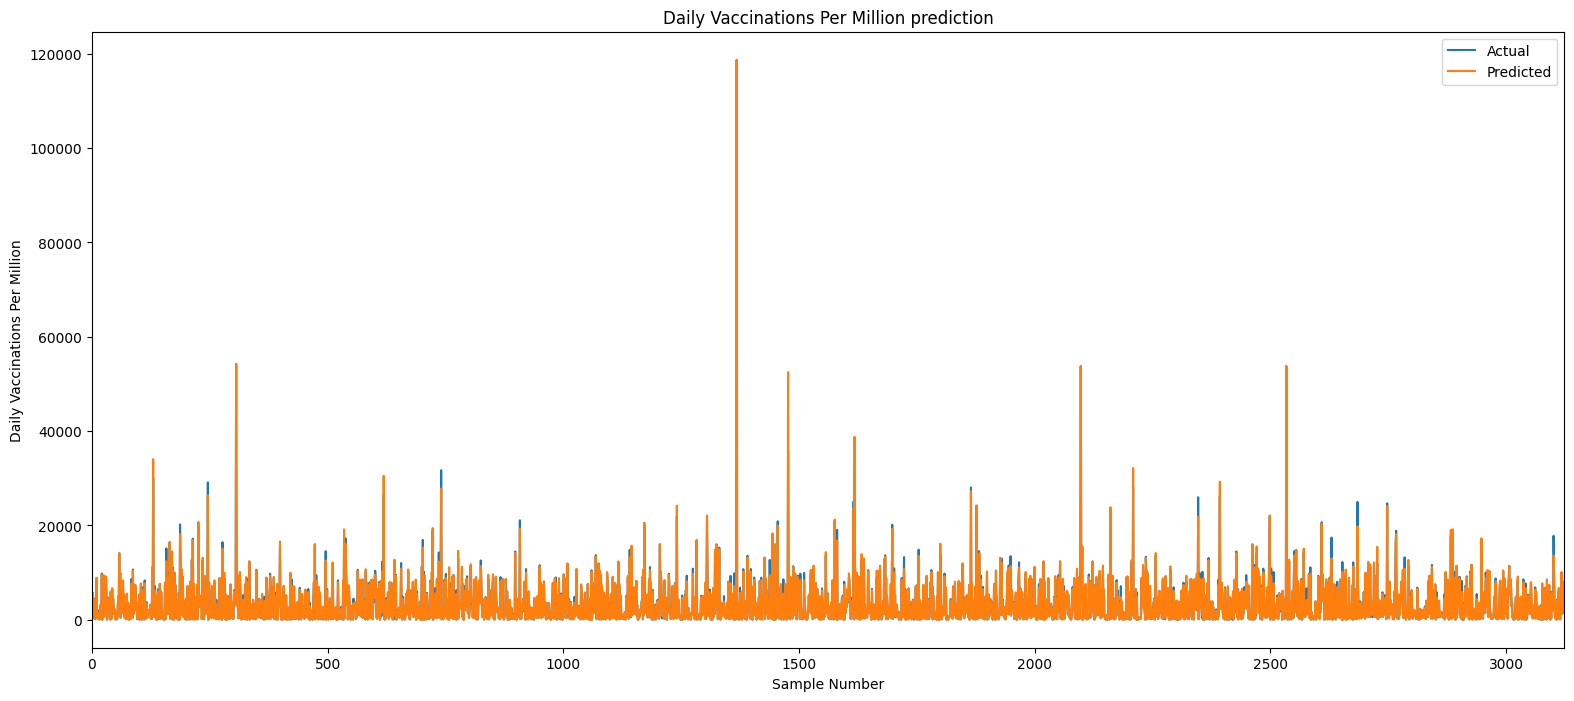

In [96]:
plt.figure(figsize=(19,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.xlim(0,len(X_test))
plt.xlabel('Sample Number')
plt.ylabel('Daily Vaccinations Per Million')
plt.title('Daily Vaccinations Per Million prediction')

In [97]:
scores = cross_validate(DTsklearn, X_train, y_train, cv=10, scoring=scoring)

In [98]:
scores

{'fit_time': array([0.11021948, 0.1035912 , 0.09941506, 0.10155392, 0.11056089,
        0.10434818, 0.09991598, 0.10536981, 0.11131859, 0.10623646]),
 'score_time': array([0.0061779 , 0.0053947 , 0.00792074, 0.00546265, 0.0056715 ,
        0.00807858, 0.00553346, 0.00595355, 0.0055058 , 0.00590563]),
 'test_neg_mean_absolute_error': array([-229.55725462, -244.15540541, -227.25213371, -260.28129445,
        -254.00284495, -241.61095306, -249.94841693, -256.54144433,
        -240.91924582, -256.38633938]),
 'test_neg_mean_squared_error': array([-362422.25      , -567072.41500711, -363607.05938834,
        -720281.05085349, -591710.43314367, -414549.65433855,
        -867819.68587691, -551492.46318036, -432304.69868374,
        -527011.42511562]),
 'test_neg_root_mean_squared_error': array([-602.01515762, -753.04210706, -602.99839087, -848.69373207,
        -769.22716615, -643.85530544, -931.56840107, -742.62538549,
        -657.49882029, -725.95552558]),
 'test_r2': array([0.98328227, 0.

To avoid confusion we will focus on R2 score but I will present all the scores

In [99]:
print('MAE is: ', -scores['test_neg_mean_absolute_error'].mean())
print('MSE is: ', -scores['test_neg_mean_squared_error'].mean())
print('RMSE is: ', -scores['test_neg_root_mean_squared_error'].mean())
print('MSLE is: ', -scores['test_neg_mean_squared_log_error'].mean())
print('MAPE is: ', -scores['test_neg_mean_absolute_percentage_error'].mean())

MAE is:  246.06553326623256
MSE is:  539827.1135587788
RMSE is:  727.7479991635012
MSLE is:  0.07714553427209005
MAPE is:  5411343419179278.0


In [100]:
print('R2 Score is: ', scores['test_r2'].mean())

R2 Score is:  0.9742247262112242


### Random Forest

In [101]:
y_pred = RFsklearn.predict(X_test)

Text(0.5, 1.0, 'Daily Vaccinations Per Million prediction')

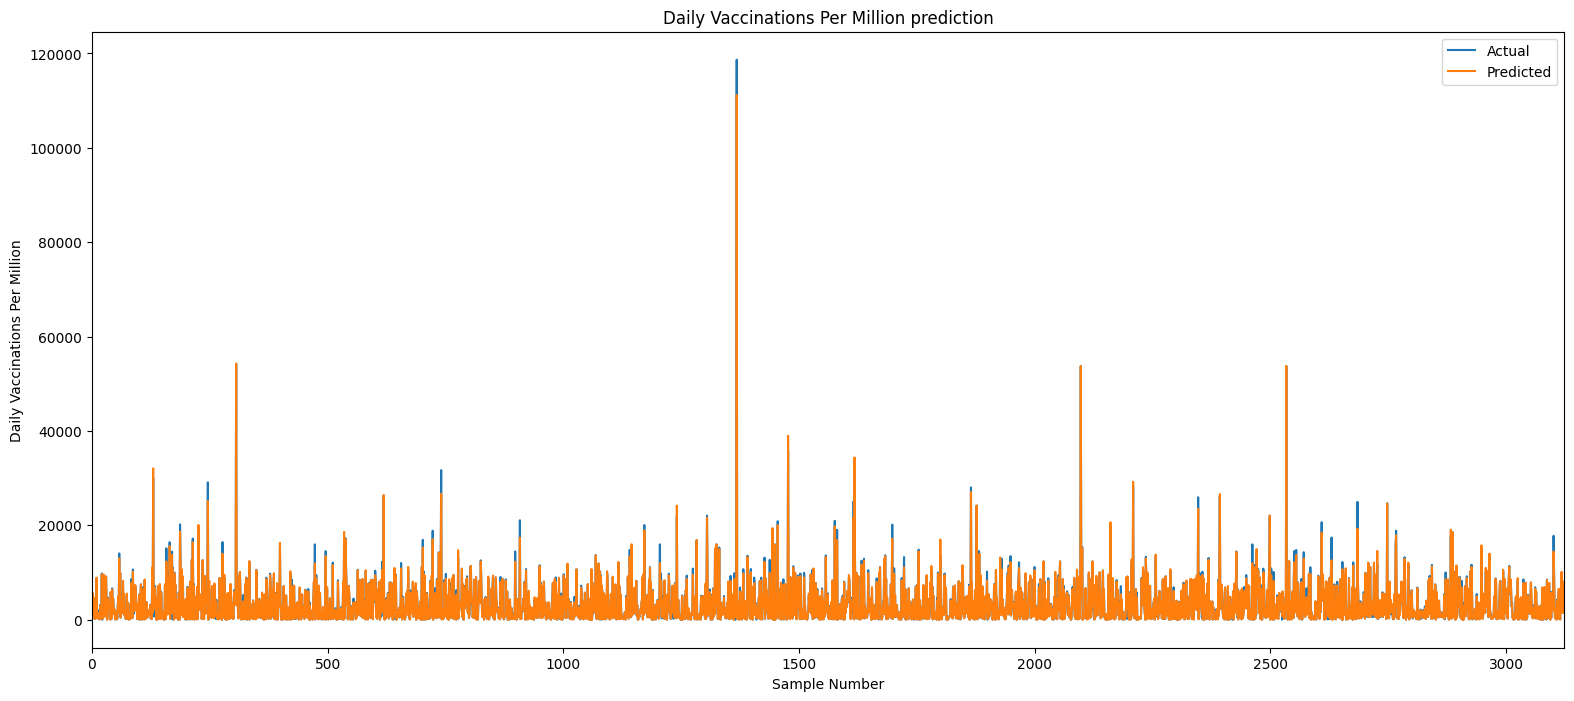

In [102]:
plt.figure(figsize=(19,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.xlim(0,len(X_test))
plt.xlabel('Sample Number')
plt.ylabel('Daily Vaccinations Per Million')
plt.title('Daily Vaccinations Per Million prediction')

In [103]:
scores = cross_validate(RFsklearn, X_train, y_train, cv=10, scoring=scoring)

In [104]:
scores

{'fit_time': array([7.69503427, 3.62187505, 3.62905121, 5.54979229, 6.27484727,
        3.53171945, 3.5982151 , 4.90275002, 6.60726881, 3.79660177]),
 'score_time': array([0.1087923 , 0.11119485, 0.09777379, 0.16461349, 0.11526942,
        0.10850096, 0.10014343, 0.16087222, 0.18098807, 0.09878922]),
 'test_neg_mean_absolute_error': array([-225.52750356, -227.04974751, -225.74992888, -227.04636202,
        -229.11479018, -241.34177809, -237.36175027, -240.02808965,
        -250.39341871, -266.51811811]),
 'test_neg_mean_squared_error': array([ -469436.08516792,  -338242.93636639,  -346893.11314424,
         -392644.09457479,  -353303.37127095,  -328151.93455853,
         -826659.33006901,  -539615.27504781, -1299704.26069996,
         -550563.04907602]),
 'test_neg_root_mean_squared_error': array([ -685.15405944,  -581.58656825,  -588.97632647,  -626.61319374,
         -594.39327997,  -572.8454718 ,  -909.20807853,  -734.58510402,
        -1140.04572746,  -741.99935922]),
 'test_r2': a

In [105]:
print('MAE is: ', -scores['test_neg_mean_absolute_error'].mean())
print('MSE is: ', -scores['test_neg_mean_squared_error'].mean())
print('RMSE is: ', -scores['test_neg_root_mean_squared_error'].mean())
print('MSLE is: ', -scores['test_neg_mean_squared_log_error'].mean())
print('MAPE is: ', -scores['test_neg_mean_absolute_percentage_error'].mean())

MAE is:  237.0131486976079
MSE is:  544521.3449975636
RMSE is:  717.5407168897859
MSLE is:  0.14477220153081705
MAPE is:  4209410763197709.5


In [106]:
print('R2 Score is: ', scores['test_r2'].mean())

R2 Score is:  0.9753657080932031


From this extensive investigation we can conclude that random forest is slightly better in terms of performance thus we are going to keep this model and save it.

## Save your final model

In [107]:
import joblib

joblib.dump(RFsklearn, 'RandomForestRegressor.pkl')

['RandomForestRegressor.pkl']

## Send us the Result (Maktabkhoone)